# Machine Learning: práctica

Vamos a utilizar un dataset de coches `cars.csv`

Queremos predecir la variable `mpg` (miles per gallon)

La métrica para evaluar modelos será RMSE

## Carga y exploración

Carga el dataset y explóralo

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("./datasets/cars.csv")

In [10]:
df.shape

(388, 9)

In [11]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,15.0
2,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,16.0
3,8,302.0,140,3449,10.5,70.0,1,ford torino,17.0
4,8,429.0,198,4341,10.0,70.0,1,ford galaxie 500,15.0


In [12]:
import seaborn as sns

In [15]:
df.sort_values("mpg")

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
21,8,304.0,193,4732,18.5,70.0,1,hi 1200d,9.0
20,8,318.0,210,4382,13.5,70.0,1,dodge d200,11.0
114,8,350.0,180,3664,11.0,73.0,1,oldsmobile omega,11.0
93,8,400.0,150,4997,14.0,73.0,1,chevrolet impala,11.0
57,8,429.0,208,4633,11.0,72.0,1,mercury marquis,11.0
...,...,...,...,...,...,...,...,...,...
316,4,90.0,48,2335,23.7,80.0,2,vw dasher (diesel),43.4
384,4,97.0,52,2130,24.6,82.0,2,vw pickup,44.0
315,4,90.0,48,2085,21.7,80.0,2,vw rabbit c (diesel),44.3
319,4,91.0,67,1850,13.8,80.0,3,honda civic 1500 gl,44.6


<Axes: xlabel='mpg', ylabel='Count'>

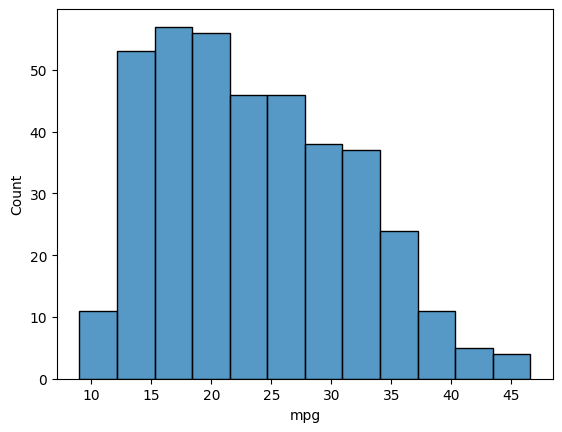

In [13]:
sns.histplot(df.mpg)

In [18]:
df.cylinders.value_counts()

cylinders
4    200
8     97
6     84
3      4
5      3
Name: count, dtype: int64

<Axes: xlabel='mpg', ylabel='Density'>

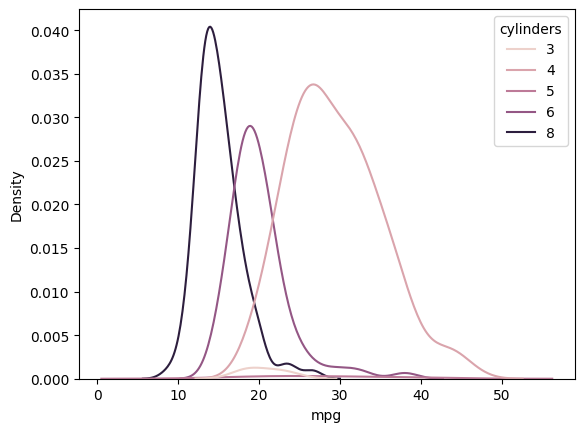

In [17]:
sns.kdeplot(x=df.mpg, hue=df.cylinders)

<Axes: xlabel='cylinders', ylabel='mpg'>

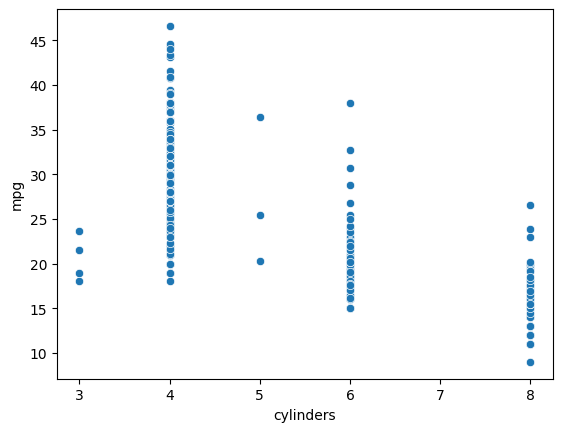

In [19]:
sns.scatterplot(x=df.cylinders, y=df.mpg)

<Axes: xlabel='acceleration', ylabel='weight'>

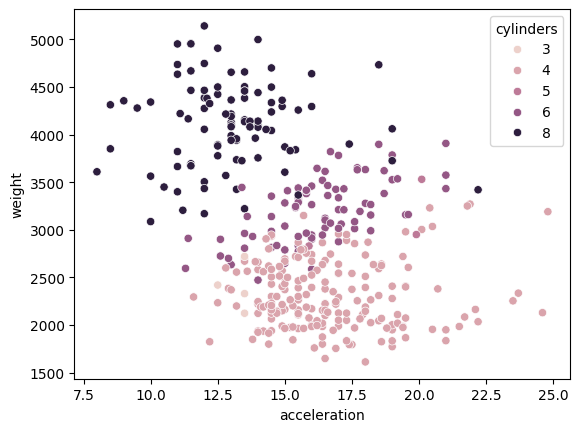

In [25]:
sns.scatterplot(x=df.acceleration, y=df.weight, hue=df.cylinders)

In [32]:
df.select_dtypes(include=['number']).corr()

,cylinders,displacement,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950364,0.894159,-0.490585,-0.343049,-0.558471,-0.770879
displacement,0.950364,1.000000,0.933494,-0.526176,-0.363685,-0.608990,-0.802459
weight,0.894159,0.933494,1.000000,-0.402132,-0.302685,-0.579440,-0.829312
acceleration,-0.490585,-0.526176,-0.402132,1.000000,0.284246,0.199685,0.411176
model_year,-0.343049,-0.363685,-0.302685,0.284246,1.000000,0.178610,0.577268
origin,-0.558471,-0.608990,-0.579440,0.199685,0.178610,1.000000,0.561255
mpg,-0.770879,-0.802459,-0.829312,0.411176,0.577268,0.561255,1.000000


## Modelado

In [35]:
df2 = df[["displacement", "acceleration", "mpg"]].copy()

In [37]:
df2.shape

(388, 3)

In [36]:
df2.head()

,displacement,acceleration,mpg
0,307.0,12.0,18.0
1,350.0,11.5,15.0
2,304.0,12.0,16.0
3,302.0,10.5,17.0
4,429.0,10.0,15.0


Vamos a hacerlo "mal", sin train test split

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(
    X=df2.drop("mpg", axis=1),
    y=df2.mpg
)

LinearRegression()

In [44]:
lr.predict([[300, 11], [280, 14]]).round(1)

/home/sheriff/.devpy/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.2, 18.3])

In [46]:
preds = lr.predict(df2[["displacement", "acceleration"]])

In [48]:
df2["preds"] = preds

In [49]:
df2.head()

,displacement,acceleration,mpg,preds
0,307.0,12.0,18.0,16.713839
1,350.0,11.5,15.0,14.089775
2,304.0,12.0,16.0,16.898442
3,302.0,10.5,17.0,17.087242
4,429.0,10.0,15.0,9.294298


In [50]:
rmse = ((df2.mpg - df2.preds) ** 2).mean() ** 0.5

In [52]:
round(rmse, 2)

4.65

"El error a futuro será 4.65"

es un enunciado "falso", pues el modelo está siendo validado con el MISMO dataset con que fue entrenado

In [55]:
import matplotlib.pyplot as plt

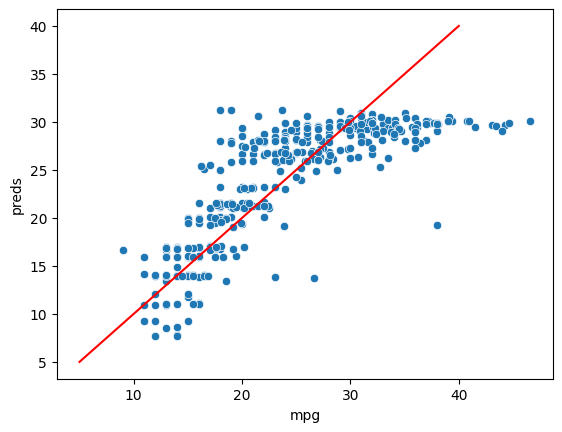

In [58]:
sns.scatterplot(x=df2.mpg, y=df2.preds)
plt.plot([5, 40], [5, 40], color="red")

Ahora hagámoslo bien

Separa el dataset en train/test

In [60]:
del df2["preds"]

In [61]:
df2.head()

,displacement,acceleration,mpg
0,307.0,12.0,18.0
1,350.0,11.5,15.0
2,304.0,12.0,16.0
3,302.0,10.5,17.0
4,429.0,10.0,15.0


In [62]:
X = df2.drop("mpg", axis=1)
y = df2.mpg

In [63]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [100]:
df2.shape

(388, 3)

In [101]:
X_train.shape

(310, 2)

In [102]:
X_test.shape

(78, 2)

In [103]:
lr = LinearRegression()

In [104]:
lr.fit(X_train, y_train)

LinearRegression()

In [105]:
X_test.head()

,displacement,acceleration
264,131.0,15.9
84,440.0,11.0
312,86.0,17.9
26,250.0,15.5
114,350.0,11.0


In [106]:
y_test.head()

264    20.3
84     13.0
312    46.6
26     17.0
114    11.0
Name: mpg, dtype: float64

In [107]:
preds_test = lr.predict(X_test).round(2)

In [108]:
preds_test[:5]

array([27.49,  8.1 , 30.28, 19.99, 13.79])

In [109]:
rmse_test = ((y_test - preds_test) ** 2).mean() ** 0.5

In [110]:
round(rmse_test, 2)

5.12

In [111]:
preds_train = lr.predict(X_train).round(2)

In [112]:
rmse_train = ((y_train - preds_train) ** 2).mean() ** 0.5

In [113]:
rmse_train

4.530168194556108

El modelo se comporta peor sobre el test que sobre el train (obvio)

Es la métrica sobre el test lo que nos interesa

### Modelo sencillo

Entrena un modelo sencillo (con 2 o 3 predictores) con el train set

Evalúa el modelo en el train set

Evalúa el modelo en el test set

### Modelo más complejo

Haz lo mismo con un modelo más complejo (más predictores)

### Cross validation

Haz validación cruzada para ver su performance